In [4]:
%run ../odr_v3.1.ipynb
import matplotlib
matplotlib.rc('font', size=14) 
%run ../arr2table_v4.0.ipynb


# NTC

In [5]:
T_NTC,R=txt2arr("NTC")
R_err=10
T25=298.15
R25=10000
T0=273.15
B=3988

def ntc_func(T):
    T=T+T0
    return R25*np.exp(-B*(1/T25-1/T))
T_theo=np.linspace(min(T_NTC),max(T_NTC),10000)
R_theo=ntc_func(T_theo)

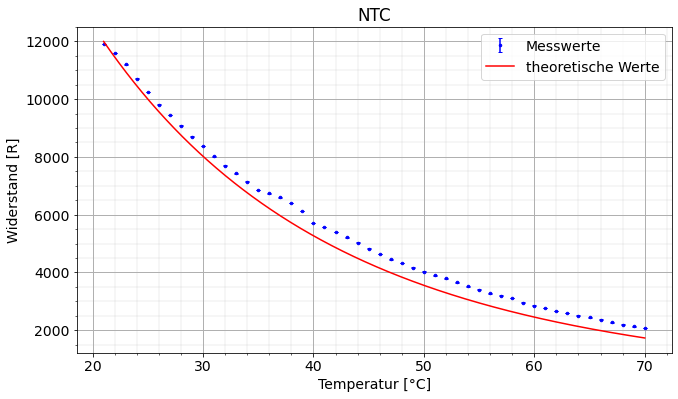

In [6]:
plt.errorbar(x=T_NTC,y=R,yerr=R_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
plt.errorbar(x=T_theo,y=R_theo,fmt='-',c='r',capsize=2,ms=5,label="theoretische Werte")
plt.ylabel("Widerstand [R]")
plt.xlabel("Temperatur [°C]")
#plt.yscale("log")
draw("NTC")
save("NTC")

# Zweiwegeregler

In [23]:
xlabel_zwr="Zeit [s]"
ylabel_zwr="Temperatur [°C]"
size=(14,7)

## ohne Hysterese (3.2)

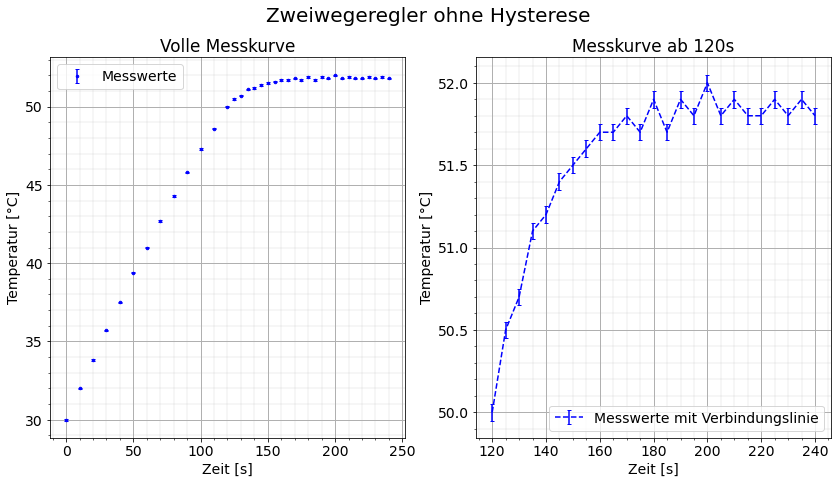

In [24]:
t_oh,T_oh=txt2arr("3.2")
T_oh_err=0.05

plt.subplot(121)
plt.errorbar(x=t_oh,y=T_oh,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_oh[12:],y=T_oh[12:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
draw("Messkurve ab 120s",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Zweiwegeregler ohne Hysterese",fontsize=20)
save("zwr_oh")

## mit Hysterese (3.3)

### R=100kOhm

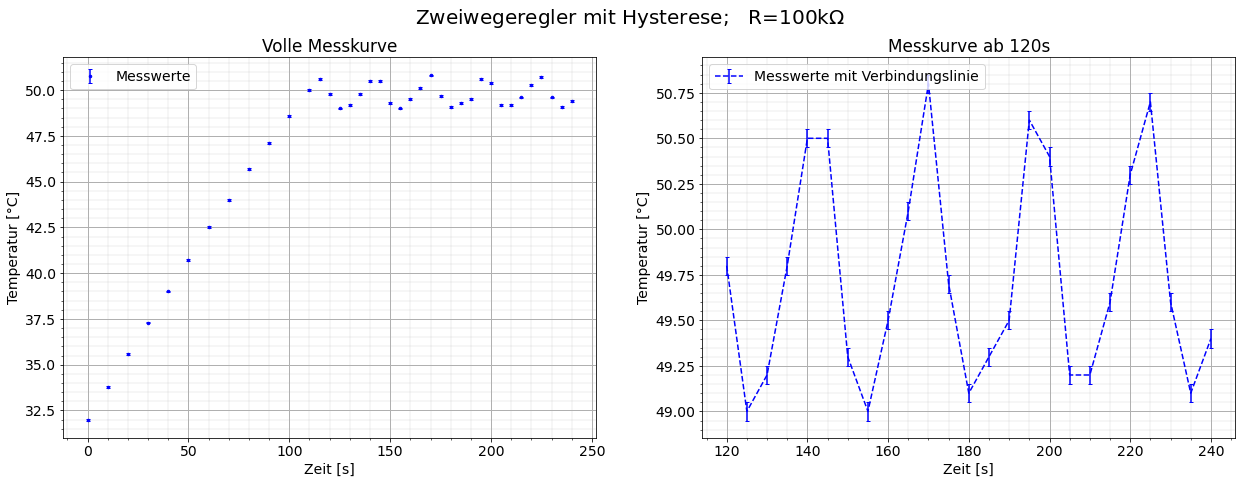

In [22]:
t_h_100,T_o_100=txt2arr("3.3.100")
T_h_100=T_oh_err

plt.subplot(121)
plt.errorbar(x=t_h_100,y=T_o_100,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_h_100[13:],y=T_o_100[13:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
#plt.ylim(48,51)
draw("Messkurve ab 120s",size=size,loc='upper left')
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Zweiwegeregler mit Hysterese;   R=100k$\Omega$",fontsize=20)
save("zwr_h_100")

### R=20kOhm

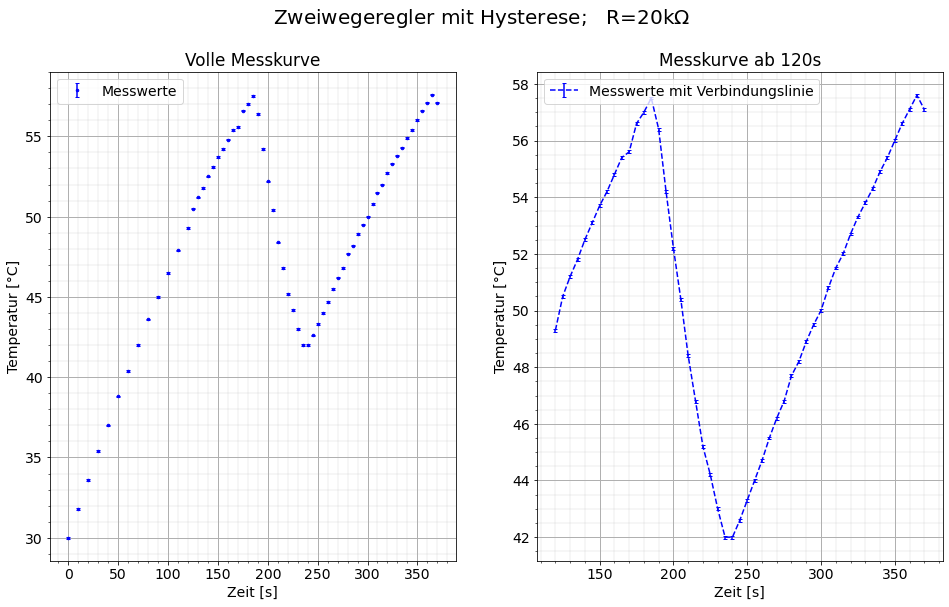

In [10]:
t_h_20,T_o_20=txt2arr("3.3.20")
T_h_20=T_oh_err

plt.subplot(121)
plt.errorbar(x=t_h_20,y=T_o_20,yerr=T_oh_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_h_20[12:],y=T_o_20[12:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
#plt.ylim(48,51)
draw("Messkurve ab 120s",size=size,loc='upper left')
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Zweiwegeregler mit Hysterese;   R=20k$\Omega$",fontsize=20)
save("zwr_h_20")

# P-Regler

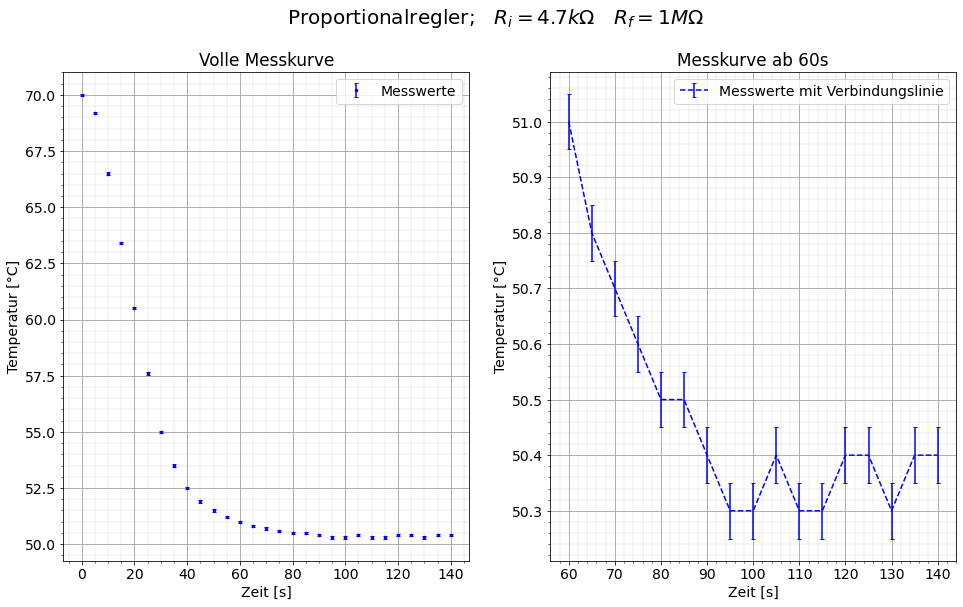

In [11]:
t_p,T_p=txt2arr("3.4")
T_p_err=0.05

plt.subplot(121)
plt.errorbar(x=t_p,y=T_p,yerr=T_p_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_p[12:],y=T_p[12:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
draw("Messkurve ab 60s",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Proportionalregler;   $R_i=4.7k\Omega \quad R_f=1M\Omega$",fontsize=20)
save("p-regler")

# PI-Regler

## C=100µF

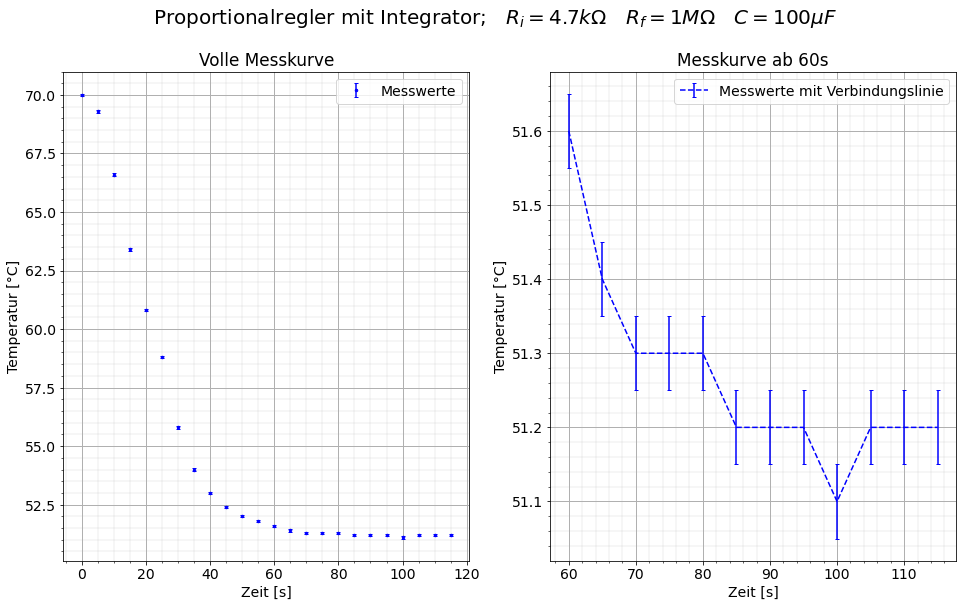

In [12]:
t_pi_100,T_pi_100=txt2arr("3.5.100")
T_pi_err=0.05

plt.subplot(121)
plt.errorbar(x=t_pi_100,y=T_pi_100,yerr=T_pi_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_pi_100[12:],y=T_pi_100[12:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
draw("Messkurve ab 60s",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Proportionalregler mit Integrator;   $R_i=4.7k\Omega \quad R_f=1M\Omega \quad C=100µF$",fontsize=20)
save("pi-regler_100")

## C=10µF

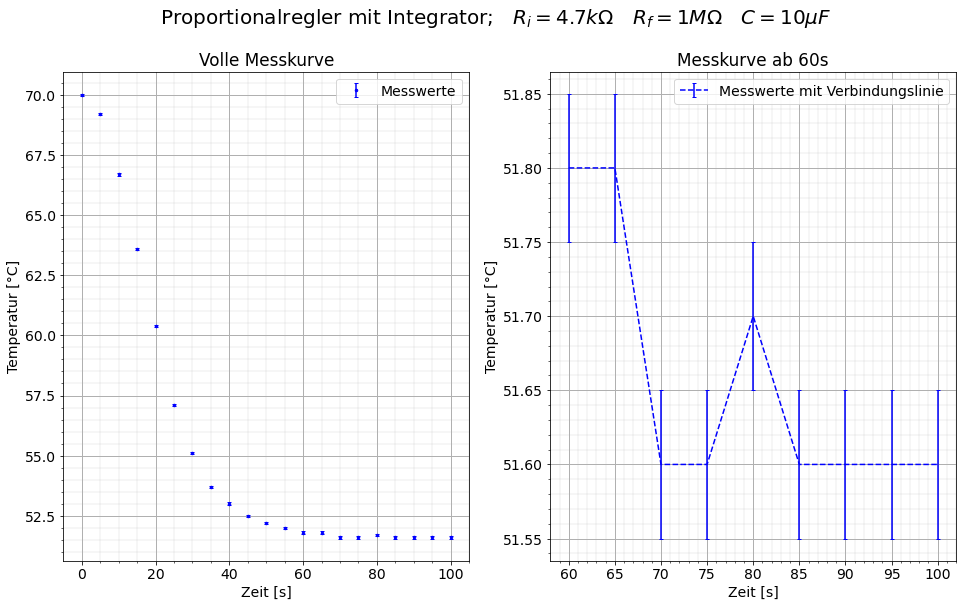

In [13]:
t_pi_10,T_pi_10=txt2arr("3.5.10")
T_pi_err=0.05

plt.subplot(121)
plt.errorbar(x=t_pi_10,y=T_pi_10,yerr=T_pi_err,fmt='.',c='b',capsize=2,ms=5,label="Messwerte")
draw("Volle Messkurve")
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.subplot(122)
plt.errorbar(x=t_pi_10[12:],y=T_pi_10[12:],yerr=T_oh_err,fmt='--',c='b',capsize=2,ms=5,label="Messwerte mit Verbindungslinie")
draw("Messkurve ab 60s",size=size)
plt.xlabel(xlabel_zwr)
plt.ylabel(ylabel_zwr)

plt.suptitle("Proportionalregler mit Integrator;   $R_i=4.7k\Omega \quad R_f=1M\Omega \quad C=10µF$",fontsize=20)
save("pi-regler_10")